# <b>FIFA 19 Data Analysis</b>

## Overview

FIFA 19 è un videogioco di calcio sviluppato da EA Sports, pubblicato il 28 settembre 2018 per PlayStation 3 (con supporto PlayStation Move), PlayStation 4, Xbox 360, Xbox One (con Kinect), Microsoft Windows e Nintendo Switch.

In quest'analisi studieremo il valore dei giocatori presenti nel dataset, come esso varia all'interno della popolazione, se (ed eventualmente come) è possibile calcolare il valore di un giocatore e proveremo a classificare i giocatori per mentalità (difensiva o offensiva).

## Librerie

Importiamo le librerie che useremo nelle nostre analisi sul dataset.

In [1]:
# Data manipulation
import numpy as np
import pandas as pd

# Data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Data statistics
from scipy.stats import norm
from statsmodels.formula.api import ols
from statsmodels.graphics.gofplots import qqplot
from sklearn.model_selection import train_test_split

## Dataset

Utilizzeremo un dataset contenente le informazioni di tutti i calciatori presenti sul gioco FIFA19. Il dataset è disponibile su Kaggle all'indirizzo https://www.kaggle.com/dczerniawko/fifa19-analysis.

In [2]:
# Load dataset
original_data = pd.read_csv('input/data.csv', index_col='Unnamed: 0')
# Show dataset info
original_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18207 entries, 0 to 18206
Data columns (total 88 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ID                        18207 non-null  int64  
 1   Name                      18207 non-null  object 
 2   Age                       18207 non-null  int64  
 3   Photo                     18207 non-null  object 
 4   Nationality               18207 non-null  object 
 5   Flag                      18207 non-null  object 
 6   Overall                   18207 non-null  int64  
 7   Potential                 18207 non-null  int64  
 8   Club                      17966 non-null  object 
 9   Club Logo                 18207 non-null  object 
 10  Value                     18207 non-null  object 
 11  Wage                      18207 non-null  object 
 12  Special                   18207 non-null  int64  
 13  Preferred Foot            18159 non-null  object 
 14  Intern

Il dataset contiene 18207 osservazioni ed 88 colonne: id, nome, età, foto, nazione, bandiera, valore complessivo (overall), potenziale, club, logo del club, valore di mercato, piede preferito, reputazione internazionale (valore da 1 a 5), piede debole (valore da 1 a 5), mosse di abilità (valore da 1 a 5), ecc...

Dato che alcuni campi non saranno oggetto della nostra analisi, effettuiamo un drop delle colonne superflue; inoltre, per praticità, rinominiamo i campi residui. Mostriamo quindi i primi 5 record del dataset così ottenuto.

In [3]:
# Copy dataset
data = original_data.copy()

# Drop unused columns
data = data.drop(['ID', 'Photo', 'Flag', 'Club Logo', 'Real Face', 'Loaned From'], 1)

# Rename columns
data.columns = data.columns.str.strip().str.lower().str.replace(' ', '_').str.replace('(', '').str.replace(')', '').str.replace('\'','').str.replace('-','_').str.replace('&','_')

# Show the first five rows
data.head()

,name,age,nationality,overall,potential,club,value,wage,special,preferred_foot,...,composure,marking,standingtackle,slidingtackle,gkdiving,gkhandling,gkkicking,gkpositioning,gkreflexes,release_clause
0,L. Messi,31,Argentina,94,94,FC Barcelona,€110.5M,€565K,2202,Left,...,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,Cristiano Ronaldo,33,Portugal,94,94,Juventus,€77M,€405K,2228,Right,...,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
2,Neymar Jr,26,Brazil,92,93,Paris Saint-Germain,€118.5M,€290K,2143,Right,...,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
3,De Gea,27,Spain,91,93,Manchester United,€72M,€260K,1471,Right,...,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
4,K. De Bruyne,27,Belgium,91,92,Manchester City,€102M,€355K,2281,Right,...,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M


## Analisi quantitativa

Diamo un rapido sguardo ai nostri dati.
Visualizzamo innanzitutto la distribuzione del valore complessivo dei giocatori.

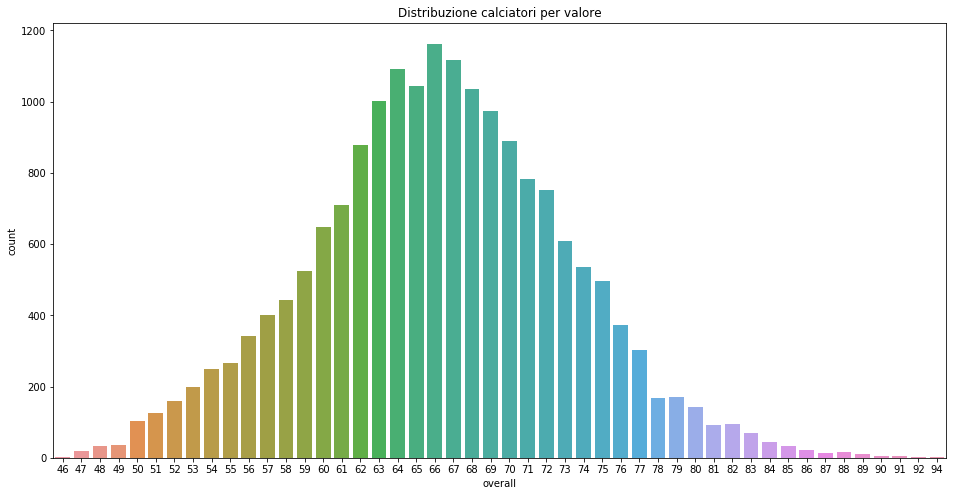

In [4]:
# overall players distribution
plt.figure(figsize=(16,8))
plt.title('Distribuzione calciatori per valore')
sns.countplot(x='overall', data=data)

Vediamo adesso il valore medio dei calciatori, distinto per nazione.

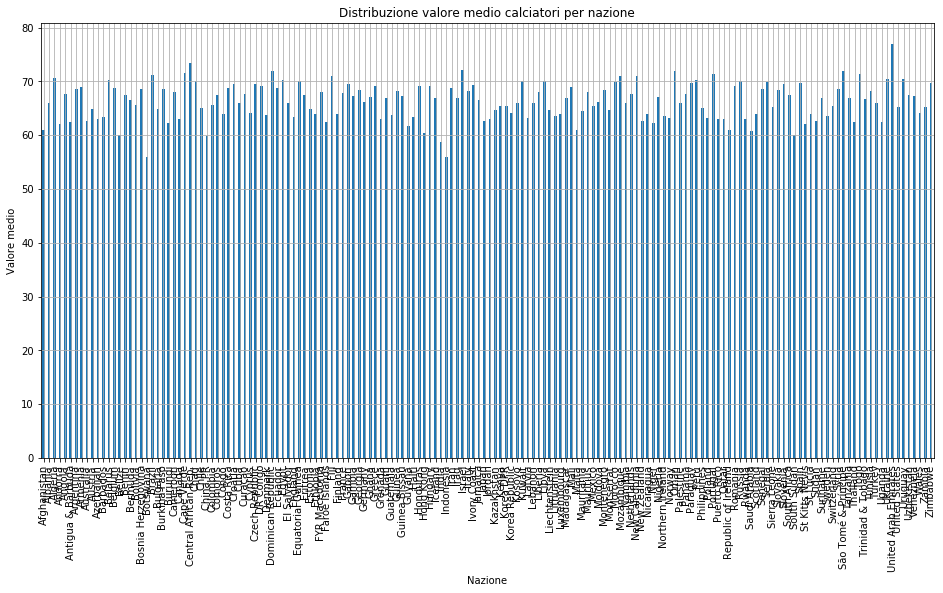

In [5]:
# overall players distribution for nation
data.groupby('nationality')['overall'].mean().plot.bar(figsize=(16,8))
plt.title('Distribuzione valore medio calciatori per nazione')
plt.xlabel('Nazione')
plt.ylabel('Valore medio')
plt.grid()
plt.show()

Come si può vedere, il plot non risulta chiaramente leggibile; possiamo tuttavia notare che la media per nazioni oscilla solitamnente tra i 60 ed i 70, con qualche eccezione. 

Continuiamo ad osservare il valore dei giocatori per singola nazione; vediamo ora quali sono i 50 paesi aventi giocatori con il più alto valore tecnico possibile tra le loro fila.

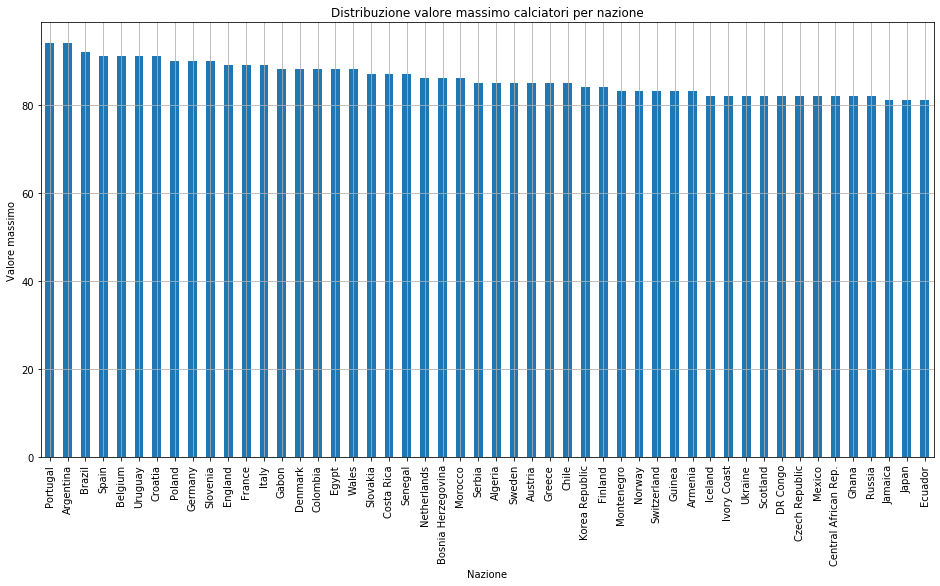

In [6]:
# Top 50 nations for max overall
data.groupby('nationality')['overall'].max().sort_values(ascending=False)[0:50].plot.bar(figsize=(16,8))
plt.title('Distribuzione valore massimo calciatori per nazione')
plt.xlabel('Nazione')
plt.ylabel('Valore massimo')
plt.grid()
plt.show()

In [7]:
# Top 50 nations for max overall
data.groupby('nationality')['overall'].max().sort_values(ascending=False)[0:50]

nationality
Portugal                94
Argentina               94
Brazil                  92
Spain                   91
Belgium                 91
Uruguay                 91
Croatia                 91
Poland                  90
Germany                 90
Slovenia                90
England                 89
France                  89
Italy                   89
Gabon                   88
Denmark                 88
Colombia                88
Egypt                   88
Wales                   88
Slovakia                87
Costa Rica              87
Senegal                 87
Netherlands             86
Bosnia Herzegovina      86
Morocco                 86
Serbia                  85
Algeria                 85
Sweden                  85
Austria                 85
Greece                  85
Chile                   85
Korea Republic          84
Finland                 84
Montenegro              83
Norway                  83
Switzerland             83
Guinea                  83
Armenia         

Possiamo notare che solo due nazioni hanno, tra le loro fila, giocatori con il più alto valore tecnico disponibile (94). Proviamo a vedere quali sono le prime 10 nazioni aventi top players (giocatori con valore superiore o uguale a 90).

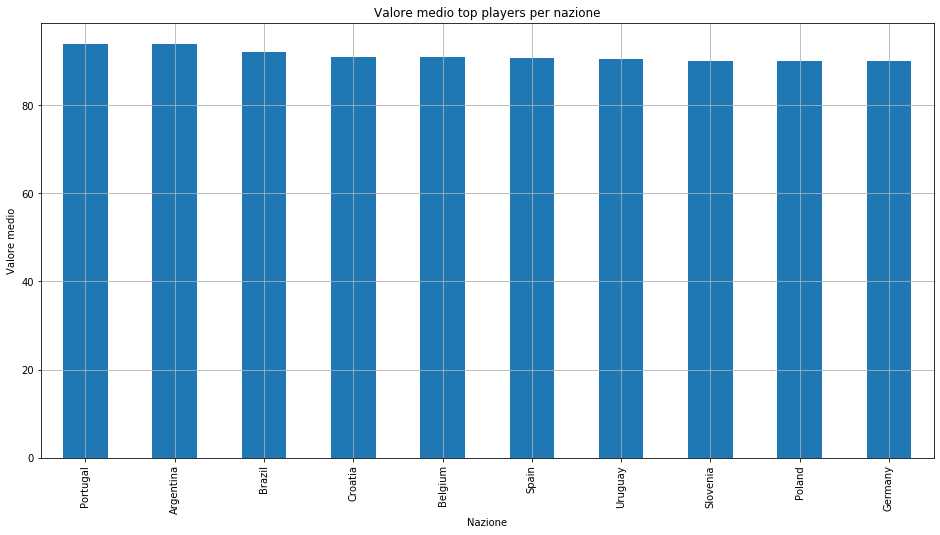

In [8]:
# Top 10 nations for mean overall
top_players_data = data[data['overall'] >= 90]
top_players_data.groupby('nationality')['overall'].mean().sort_values(ascending=False)[0:10].plot.bar(figsize=(16,8))
plt.title('Valore medio top players per nazione')
plt.xlabel('Nazione')
plt.ylabel('Valore medio')
plt.grid()
plt.show()

In [9]:
# Top players for nations 
top_players_data.groupby('nationality')['overall'].value_counts()

nationality  overall
Argentina    94         1
Belgium      91         2
Brazil       92         1
Croatia      91         1
Germany      90         1
Poland       90         1
Portugal     94         1
Slovenia     90         1
Spain        91         2
             90         1
Uruguay      90         1
             91         1
Name: overall, dtype: int64

Per una migliore visualizzazione dei risultati, normalizziamo il campo 'overall' in 0-1.

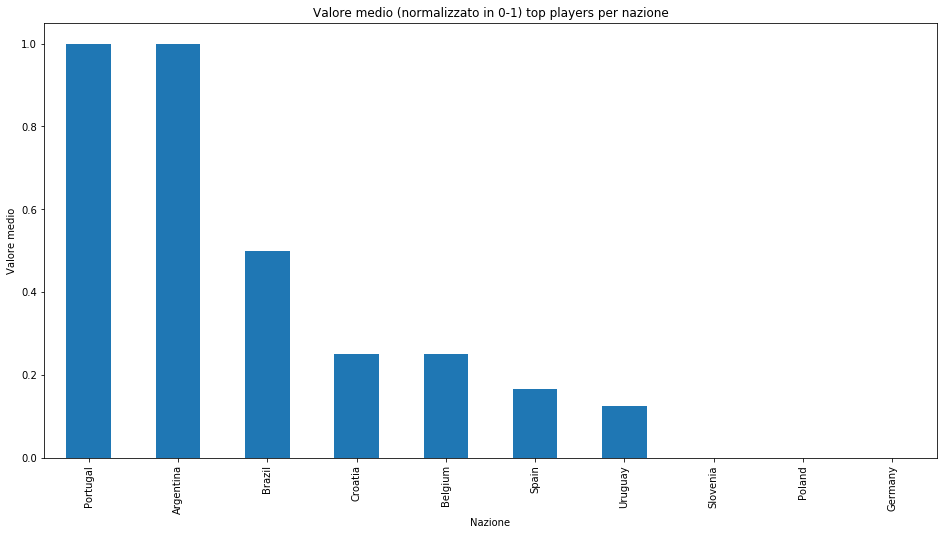

In [10]:
# Top 10 nations for mean overall (normalized version)
top_players_data_norm = top_players_data.copy()
top_players_data_norm['overall']  = (top_players_data['overall']-top_players_data['overall'].min())/(top_players_data['overall'].max()-top_players_data['overall'].min())
top_players_data_norm.groupby('nationality')['overall'].mean().sort_values(ascending=False)[0:10].plot.bar(figsize=(16,8))
plt.title('Valore medio (normalizzato in 0-1) top players per nazione')
plt.xlabel('Nazione')
plt.ylabel('Valore medio')
plt.show()

In [11]:
# Top players for nations (normalized version)
top_players_data_norm.groupby('nationality')['overall'].value_counts()

nationality  overall
Argentina    1.00       1
Belgium      0.25       2
Brazil       0.50       1
Croatia      0.25       1
Germany      0.00       1
Poland       0.00       1
Portugal     1.00       1
Slovenia     0.00       1
Spain        0.25       2
             0.00       1
Uruguay      0.00       1
             0.25       1
Name: overall, dtype: int64

In [12]:
# Nations with top players
top_players_nations = top_players_data['nationality'].unique().tolist()
top_players_nations

['Argentina',
 'Portugal',
 'Brazil',
 'Spain',
 'Belgium',
 'Croatia',
 'Uruguay',
 'Slovenia',
 'Poland',
 'Germany']

Dalle informazioni ottenute sui top players, possiamo affermare che le nazioni in cui è possibile trovarli sono 10 e che solo in Argentina ed in Portogallo si possono individuare calciatori con il valore massimo in circolazione.
Tali informazioni però risultano non esaustive qualora si vogliano trovare giocatori di ottimo profilo; cerchiamo dunque good players (calciatori con overall a partire da 80) nelle varie nazioni.

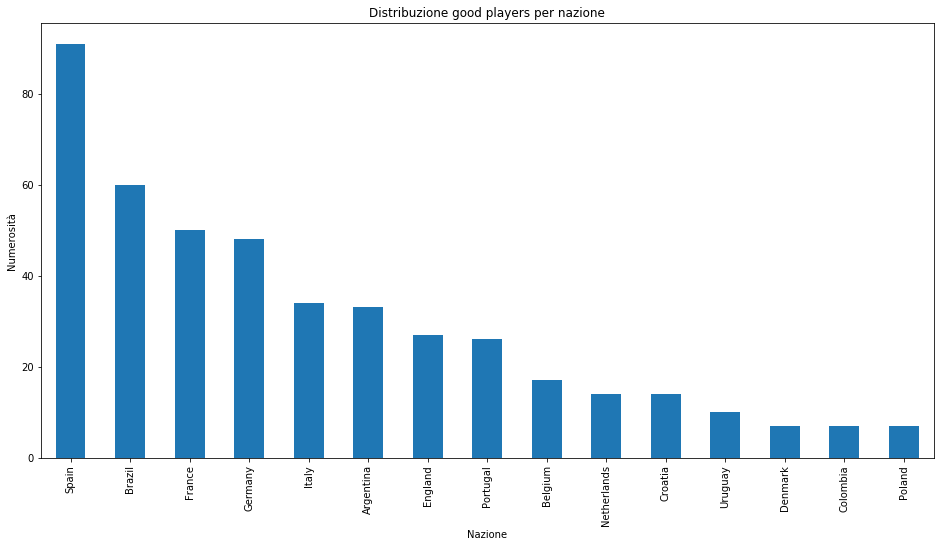

In [13]:
good_players_data = data[data['overall'] >= 80]
good_players_data['nationality'].value_counts().sort_values(ascending=False)[0:15].plot.bar(figsize=(16,8))
plt.title('Distribuzione good players per nazione')
plt.xlabel('Nazione')
plt.ylabel('Numerosità')
plt.show()

In [14]:
# Nations with good players
good_players_nations = good_players_data['nationality'].value_counts().sort_values(ascending=False)[0:15]
good_players_nations_list = good_players_nations.index.tolist() 
good_players_nations

Spain          91
Brazil         60
France         50
Germany        48
Italy          34
Argentina      33
England        27
Portugal       26
Belgium        17
Netherlands    14
Croatia        14
Uruguay        10
Denmark         7
Colombia        7
Poland          7
Name: nationality, dtype: int64

Come si può vedere dal precedente grafico a barre, le nazioni principali sono 15 e quella con il
maggior numero di good players è la Spagna.

A seguito di quanto sopra, qualora si volesse investire per la ricerca di good players, sarebbe più utile considerare profili di nazionalità spagnola piuttosto che portoghese.

Abbiamo dato uno sguardo ai valori dei giocatori (numerosità, distribuzione, ecc..), ma non abbiamo ancora evidenziato nulla sulla "provenienza" dei dati all'interno del dataset in esame.

In [15]:
# Number of countries available and top 10 countries with highest number of players
print('Total number of countries : {0}'.format(data['nationality'].nunique()))
data['nationality'].value_counts().head(10)

# European Countries have most players

Total number of countries : 164


England        1662
Germany        1198
Spain          1072
Argentina       937
France          914
Brazil          827
Italy           702
Colombia        618
Japan           478
Netherlands     453
Name: nationality, dtype: int64

Come è possibile notare, i paesi che maggiormente contribuiscono al dataset sono europei.

## Analisi popolazione

Abbiamo visto a grandi linee com'è composto il nostro dataset, ma non abbiamo ancora osservato i dati con un approccio statistico.

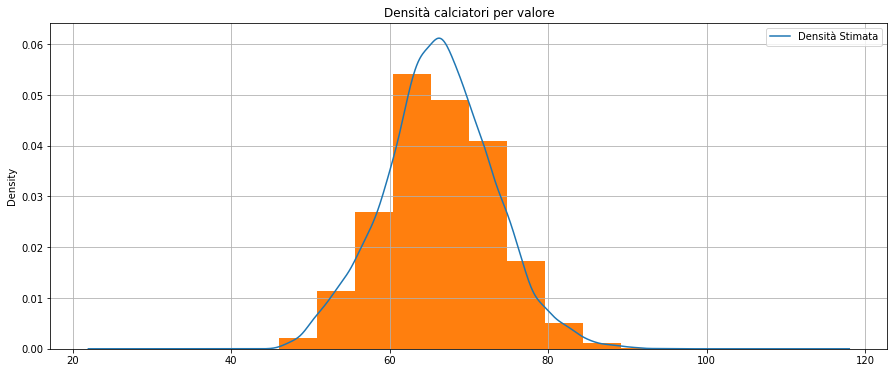

In [16]:
# overall players density
data['overall'].plot.density(figsize=(15,6))
plt.hist(data['overall'], density=True)
plt.title('Densità calciatori per valore')
plt.legend(['Densità Stimata'])
plt.grid()
plt.show()

In [17]:
data['overall'].describe()

count    18207.000000
mean        66.238699
std          6.908930
min         46.000000
25%         62.000000
50%         66.000000
75%         71.000000
max         94.000000
Name: overall, dtype: float64

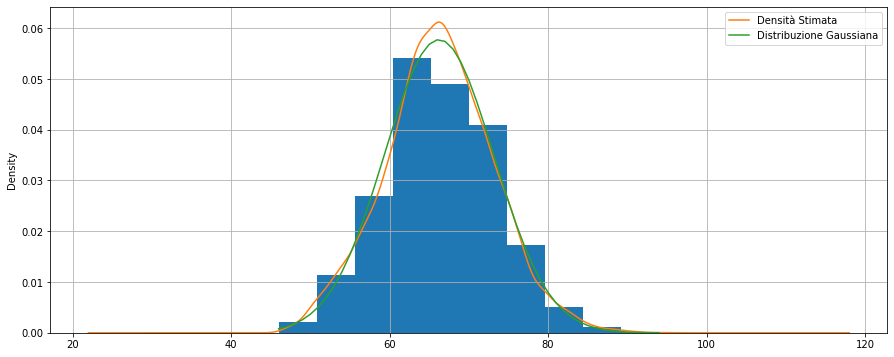

In [18]:
# overall players density
mu = data['overall'].mean()
sigma = data['overall'].std()

g = norm(mu,sigma)
x = data['overall'].unique()

plt.figure(figsize=(15,6))
data['overall'].plot.hist(density=True)
data['overall'].plot.density()
plt.plot(x,g.pdf(x))
plt.grid()
plt.legend(['Densità Stimata','Distribuzione Gaussiana'])
plt.show()

Come possiamo notare dal grafico precedente, i valori dei giocatori sembrano distribuirsi secondo una distribuzione Gaussiana di media 66.238699 e deviazione standard 6.908930.

Per completezza effettuiamo un plot della CDF.

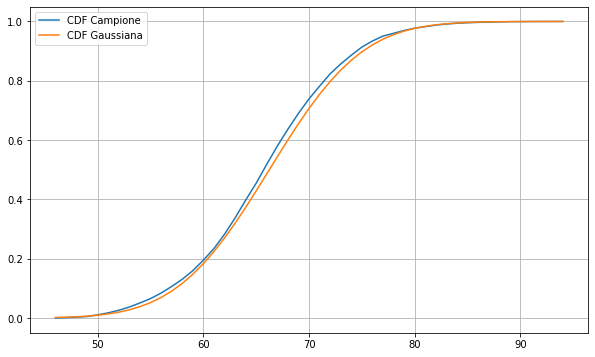

In [19]:
cdf_overall = data['overall'].value_counts(normalize=True).sort_index().cumsum()

plt.figure(figsize=(10,6))
cdf_overall.plot()
plt.plot(x,g.cdf(x))
plt.grid()
plt.legend(['CDF Campione','CDF Gaussiana'])
plt.show()

Il plot ci permette di fare alcune considerazioni qualitative sulle due distribuzioni; in particolare, le due CDF si "assomigliano" in modo significativo.

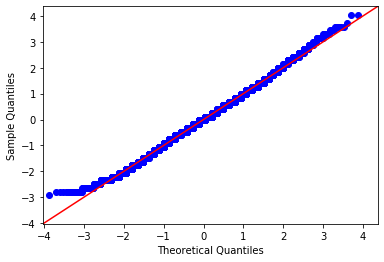

In [20]:
qqplot(data['overall'], fit=True, line='45')
plt.show()

Il plot mette in relazione i quantili "teorici" con quelli del campione. Il fatto che solo pochi punti del plot non giacciano sulla diagonale indica che c'è una minima discrepanza tra la distribuzione empirica dei dati e quella Gaussiana, lieve asimmetria sinistra. 

A seguito dell'analisi mediante CDF e Q-Q plot, possiamo affermare che l'ipotesi secondo la quale i dati si distribuiscono con un andamento gaussiano è corretta.

Vediamo adesso qualche altra informazione sul valore dei calciatori presenti nel nostro dataset.

In [21]:
data['overall'].median()

66.0

In [22]:
data['overall'].mode()[0]

66

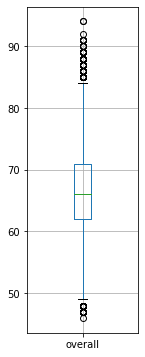

In [23]:
data['overall'].plot.box(figsize=(2,6))
plt.grid()
plt.show()

Come possiamo notare, i giocatori di ottimo livello (top e, alcuni, good players) sono veramente pochi e risultano essere degli outliers.

Diamo uno sguardo ai boxplot delle prime 15 nazioni per numero di good players.

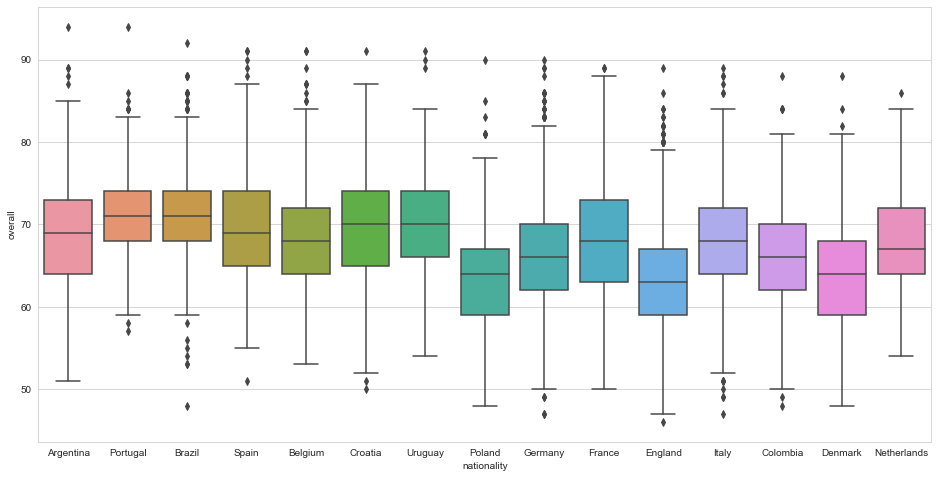

In [24]:
data_countries = data.loc[data['nationality'].isin(good_players_nations_list)]

plt.rcParams['figure.figsize'] = (16, 8)
sns.set_style('whitegrid')
sns.boxplot(x = data_countries['nationality'], y = data_countries['overall'])

# Regressione Lineare

Adesso proveremo a calcolare una regressione lineare avendo come variabile dipendente market_value e come variabili indipendenti: overall, potential, international_reputation, age e salary.

## Preprocessing

Prima di calcolare la regressione effettuiamo una fase di preprocessing. 
Per prima cosa riempiamo i campi vuoti delle caratteristiche che prenderemo in esame.

In [25]:
# filling the missing value for the continous variables for proper data visualization
data['release_clause'].fillna('€0', inplace = True)
data['contract_valid_until'].fillna('2017', inplace = True)
data['international_reputation'].fillna(1, inplace = True)

Modifichiamo adesso la natura di alcune caratteristiche, così da poterle sfruttare per la regressione.

In [26]:
# The value has some non numeric mark so I extract rigth value
def value_to_int(df_value):
    try:
        value = float(df_value[1:-1])
        suffix = df_value[-1:]

        if suffix == 'M':
            value = value * 1000000
        elif suffix == 'K':
            value = value * 1000
    except ValueError:
        value = 0
    return value

data['market_value'] = data['value'].apply(value_to_int)
data['salary'] = data['wage'].apply(value_to_int)
data['release_clause'] = data['release_clause'].apply(value_to_int)
data.drop(['value','wage'], 1, inplace=True)

In [27]:
# The value has some non numeric mark so I extract rigth value
def date_to_int(df_value):
    try:
        value = int(df_value.split(", ", 1)[-1])
    except ValueError:
        value = 0
    return value

data['contract_valid_until'] = data['contract_valid_until'].apply(date_to_int)

Abbiamo apportato le opportune modifiche al dataset; passiamo dunque ad analizzare la correlazione dei nostrri dati.

<Figure size 1440x1440 with 0 Axes>

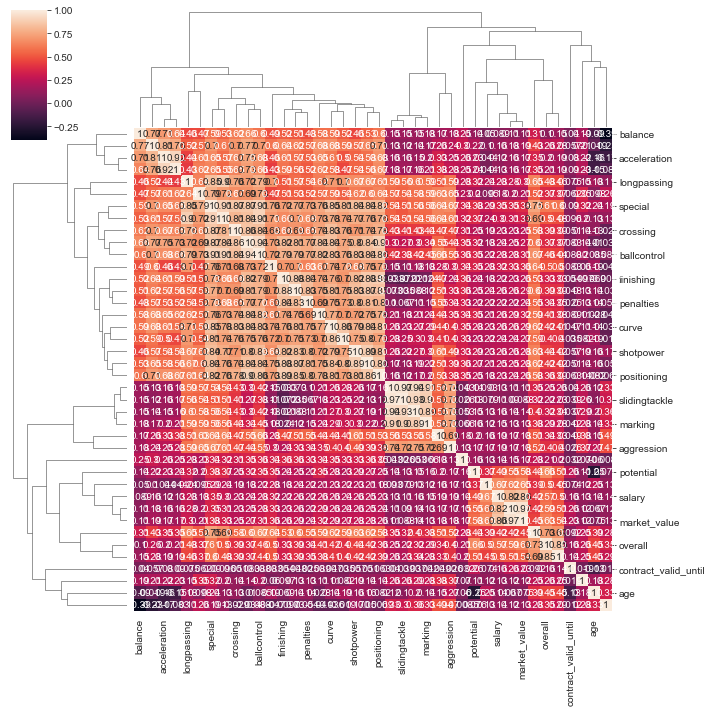

In [28]:
plt.figure(figsize=(20,20))

prefixes = ('gk', 'jersey', 'name', 'nationality', 'club', 'preferred_foot', 'joined')
corr_list = list(data.columns.values)
for word in corr_list[:]:
    if word.startswith(prefixes):
        corr_list.remove(word)

sns.clustermap(data[corr_list].corr(),annot = False);

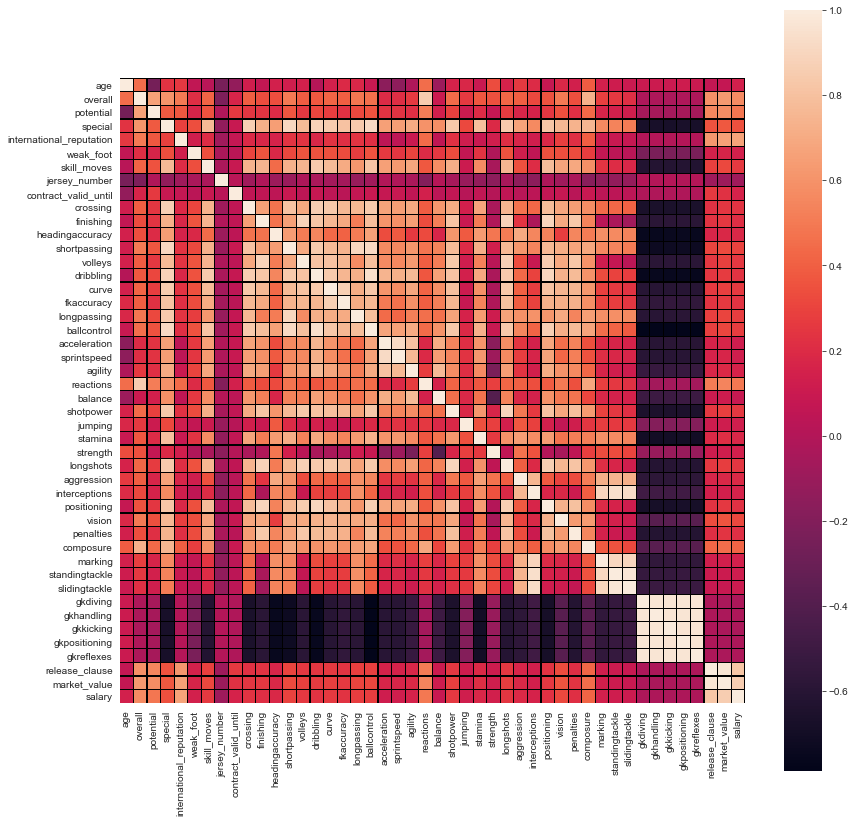

In [29]:
plt.figure(figsize=(14,14))
sns.heatmap(data.corr(), linewidths=0.1, linecolor='black', square=True)

Come possiamo notare dalla matrice di correlazione, tra le componenti che permettono di determinare l'abilità di un portiere, esiste una forte correlazione.

Nonostante ciò, non ci soffermeremo a questa indagine bensì cercheremo, se esiste, una correlazione tra il valore di mercato dei giocatori ed il loro valore (overall).

Dando un ulteriore sguardo sembrerebbe che il valore di mercato sia correlato in maniera moderata al valore del giocatore, al suo potenziale e alla reputazione internazionale dello stesso.

Proviamo a plottare il valore di mercato e l'overall dei giocatori.

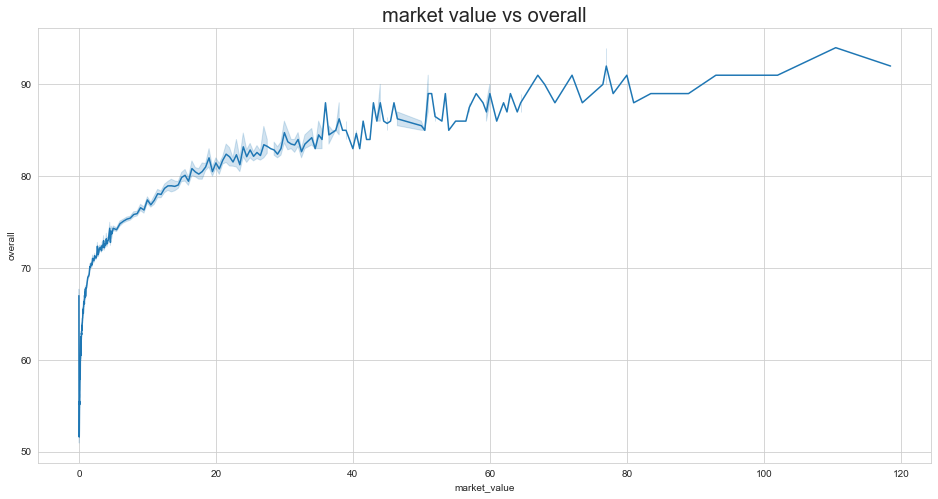

In [30]:
sns.lineplot(data['market_value'] / 1000000, data['overall'], palette = 'Wistia')
plt.title('market value vs overall', fontsize = 20)

plt.show()

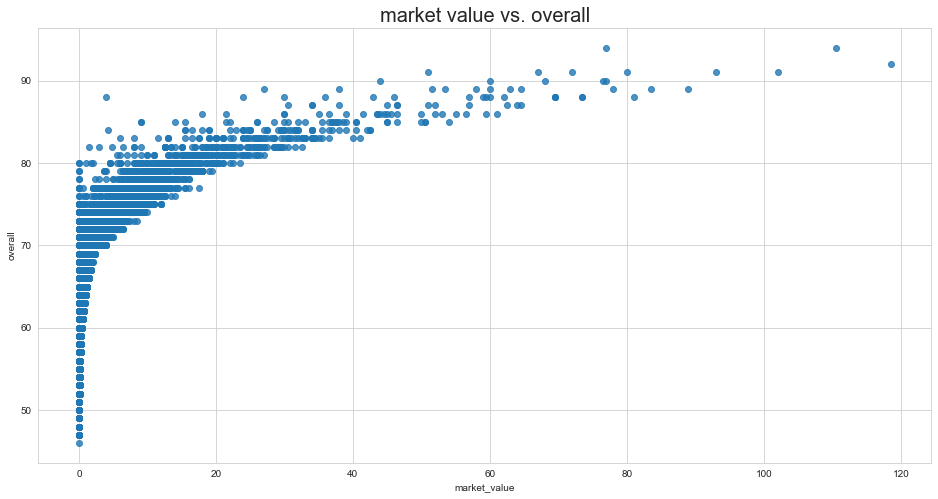

In [31]:
ax = sns.regplot(x = data['market_value'] / 1000000, y = data['overall'], fit_reg = False);
ax.set_title(label='market value vs. overall', fontsize=20);

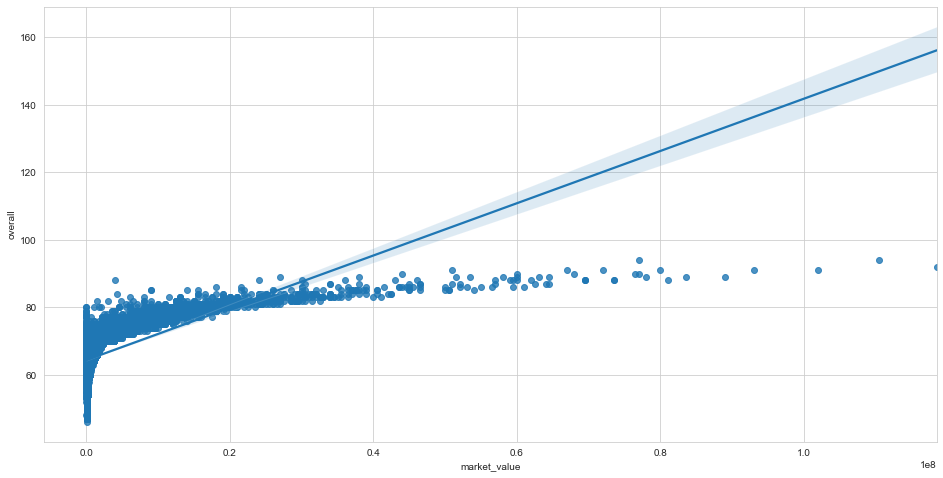

In [32]:
sns.regplot('market_value', 'overall', data)
plt.show()

In [33]:
model = ols("market_value ~ overall", data).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           market_value   R-squared:                       0.393
Model:                            OLS   Adj. R-squared:                  0.393
Method:                 Least Squares   F-statistic:                 1.180e+04
Date:                Sat, 13 Jun 2020   Prob (F-statistic):               0.00
Time:                        19:10:43   Log-Likelihood:            -3.0417e+05
No. Observations:               18207   AIC:                         6.084e+05
Df Residuals:                   18205   BIC:                         6.084e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -3.123e+07   3.11e+05   -100.292      0.000   -3.18e+07   -3.06e+07
overall     5.078e+05   4675.184    108.621      0.000    4.99e+05    5.17e+05
==============================================================================
Omnibus:                    24549.234   Durbin-Watson:                   0.225
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          8046817.791
Skew:                           7.632   Prob(JB):                         0.00
Kurtosis:                     104.853   Cond. No.                         642.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Come possiamo notare, un normale regressore lineare che prenda in input il solo valore del giocatore non è affidabile; poichè la curva dei dati suggerisce un andamento di tipo logaritmico, proviamo a far uso di un regressore logaritmico.

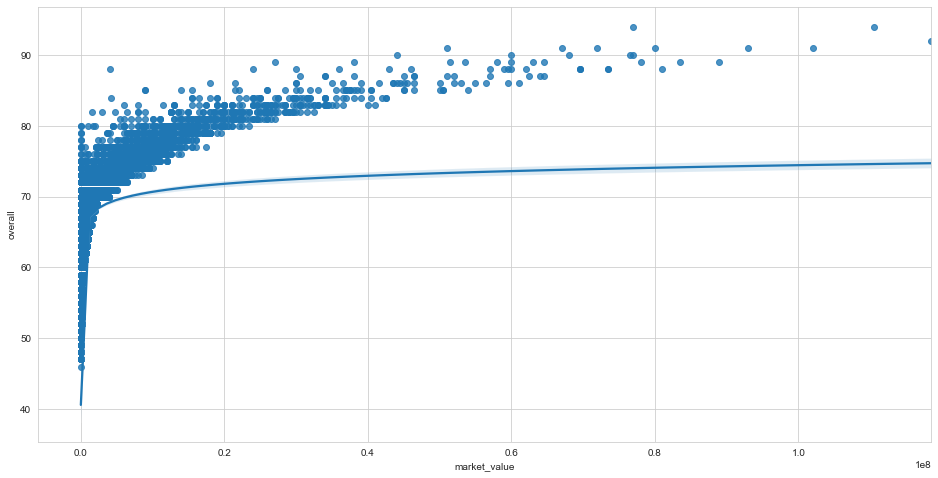

In [34]:
data_logx = data.copy()
def fix_market_value(df_value):
    if (df_value == 0.0):
        return 0.1
    else:
        return df_value
    
data_logx['market_value'] = data_logx['market_value'].apply(fix_market_value)
sns.regplot('market_value', 'overall', data_logx, logx=True)
plt.show()

In [61]:
model = ols("market_value ~ np.log(overall)", data).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           market_value   R-squared:                       0.340
Model:                            OLS   Adj. R-squared:                  0.340
Method:                 Least Squares   F-statistic:                     9373.
Date:                Sat, 13 Jun 2020   Prob (F-statistic):               0.00
Time:                        19:38:03   Log-Likelihood:            -3.0494e+05
No. Observations:               18207   AIC:                         6.099e+05
Df Residuals:                   18205   BIC:                         6.099e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept       -1.272e+08   1.34e+06    -94.985      0.000    -1.3e+08   -1.25e+08
np.log(overall)  3.094e+07    3.2e+05     96.816      0.000    3.03e+07    3.16e+07
==============================================================================
Omnibus:                    24553.859   Durbin-Watson:                   0.207
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          7704775.634
Skew:                           7.656   Prob(JB):                         0.00
Kurtosis:                     102.608   Cond. No.                         176.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Come possiamo notare, anche il regressore logaritmico non risulta affidabile, fornendo addirittura un valore R-squared lievemente più basso rispetto a quello del modello lineare.

La **regressione lineare multipla** permette di studiare le relazioni tra una variabile dipendente e un insieme di variabili indipendenti. Proviamo a farne uso e ad elaborare un modello capace di predire il prezzo di mercato.

In [75]:
model = ols("market_value ~ overall + potential + international_reputation + age",data).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           market_value   R-squared:                       0.610
Model:                            OLS   Adj. R-squared:                  0.609
Method:                 Least Squares   F-statistic:                     7104.
Date:                Sat, 13 Jun 2020   Prob (F-statistic):               0.00
Time:                        20:30:44   Log-Likelihood:            -3.0016e+05
No. Observations:               18207   AIC:                         6.003e+05
Df Residuals:                   18202   BIC:                         6.004e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept                 -2.22e+07   4.62e+05    -48.063      0.000   -2.31e+07   -2.13e+07
overall                   4.731e+05   9620.400     49.175      0.000    4.54e+05    4.92e+05
potential                 -6.11e+04   1.01e+04     -6.046      0.000   -8.09e+04   -4.13e+04
international_reputation  6.664e+06   7.72e+04     86.365      0.000    6.51e+06    6.82e+06
age                      -3.894e+05   1.12e+04    -34.900      0.000   -4.11e+05   -3.68e+05
==============================================================================
Omnibus:                    21759.607   Durbin-Watson:                   0.799
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          6243474.146
Skew:                           6.064   Prob(JB):                         0.00
Kurtosis:                      92.905   Cond. No.                     1.80e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.8e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [78]:
model = ols("market_value ~ overall + potential + international_reputation + age + salary + release_clause + contract_valid_until + reactions", data).fit()

#visualizziamo i parametri del modello
model.params

Intercept                   1.889804e+08
overall                     8.967048e+04
potential                  -2.485960e+04
international_reputation    6.298219e+05
age                        -8.852258e+04
salary                      4.169945e+01
release_clause              3.981687e-01
contract_valid_until       -9.484137e+04
reactions                   4.858796e+03
dtype: float64

In [79]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           market_value   R-squared:                       0.954
Model:                            OLS   Adj. R-squared:                  0.954
Method:                 Least Squares   F-statistic:                 4.701e+04
Date:                Sat, 13 Jun 2020   Prob (F-statistic):               0.00
Time:                        20:31:20   Log-Likelihood:            -2.7998e+05
No. Observations:               18159   AIC:                         5.600e+05
Df Residuals:                   18150   BIC:                         5.601e+05
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept                  1.89e+08   1.43e+07     13.184      0.000    1.61e+08    2.17e+08
overall                   8.967e+04   3990.845     22.469      0.000    8.18e+04    9.75e+04
potential                -2.486e+04   3485.404     -7.132      0.000   -3.17e+04    -1.8e+04
international_reputation  6.298e+05   3.22e+04     19.534      0.000    5.67e+05    6.93e+05
age                      -8.852e+04   3952.596    -22.396      0.000   -9.63e+04   -8.08e+04
salary                      41.6994      0.767     54.393      0.000      40.197      43.202
release_clause               0.3982      0.002    249.148      0.000       0.395       0.401
contract_valid_until     -9.484e+04   7099.209    -13.359      0.000   -1.09e+05   -8.09e+04
reactions                 4858.7961   1905.210      2.550      0.011    1124.405    8593.187
==============================================================================
Omnibus:                    32009.727   Durbin-Watson:                   1.873
Prob(Omnibus):                  0.000   Jarque-Bera (JB):        106995532.977
Skew:                          12.140   Prob(JB):                         0.00
Kurtosis:                     378.263   Cond. No.                     1.85e+10
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.85e+10. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Il valore di  **R<sup>2</sup>**  indica che la conoscenza delle feature considerate permette di ridurre l'errore sulle predizioni del valore di mercato del 95% . Ciò vuol dire che, le feature riescono a spiegare (linearmente) il valore di mercato e le variabili sono quindi piuttosto correlate. Il valore della F-statistic è alto, mentre quello di Prob(F-statistic) è nullo. Possiamo concludere che il regressore è statisticamente significativo. Inoltre tutti i p-value delle feature considerate dal modello sono prossimi a zero; contribuiscono pertanto in modo significativo alla regressione.

Il valore di **R<sup>2</sup>** ottenuto ci dice che il modello lineare riesce a fornire un valore aggiunto rispetto all'utilizzo del valore medio; possiamo verificarlo calcolando l'errore standard (**MSE**) utilizzando il valore medio:

In [39]:
print("MSE (valore medio):", np.sqrt(((data['market_value']-data['market_value'].mean())**2).mean()))

MSE (valore medio): 5594779.02060486


In [40]:
print("MSE (modello lineare):", np.sqrt(((data['market_value']-model.predict(data))**2).mean()))

MSE (modello lineare): 1201875.3833165977


L'errore del modello lineare è molto grande, ma è comunque nettamente inferiore rispetto a quello risultante usando il valore medio.

## Classificazione

In questa sessione cercheremo di predire il ruolo di un calciatore: portiere, difensore, centrocampista difensivo, centrocampista, centrocampista offensivo, attaccante.

### Preprocessing

Prima di fare la classificazione, eseguiamo una fase di preprocessing per pulire i dati e rimuovere feature superflue.

In [41]:
data_pre_log_reg = data.copy()
data_pre_log_reg = data_pre_log_reg[data_pre_log_reg['position'].notna()]
data_pre_log_reg['position'].unique()

array(['RF', 'ST', 'LW', 'GK', 'RCM', 'LF', 'RS', 'RCB', 'LCM', 'CB',
       'LDM', 'CAM', 'CDM', 'LS', 'LCB', 'RM', 'LAM', 'LM', 'LB', 'RDM',
       'RW', 'CM', 'RB', 'RAM', 'CF', 'RWB', 'LWB', nan], dtype=object)

In [43]:
#Create a simplified position varaible to account for all player positions
def simple_position(df_value):
    if (df_value in {'GK'}):
        return 'GK' #portiere
    elif (df_value in {'RB', 'LB', 'CB', 'LCB', 'RCB', 'RWB', 'LWB'}):
        return 'DF' #difensore
    elif (df_value in {'LDM', 'CDM', 'RDM'}):
        return 'DM' #centrocampista difensivo
    elif (df_value in {'LM', 'LCM', 'CM', 'RCM', 'RM'}):
        return 'MF' #centrocampista
    elif (df_value in {'LAM', 'CAM', 'RAM', 'LW', 'RW'}):
        return 'AM' #centrocampista offensivo
    elif (df_value in {'RS', 'ST', 'LS', 'CF', 'LF', 'RF'}):
        return 'ST' #attaccante
    else:
        return df_value
    
data_pre_log_reg['position'] = data_pre_log_reg['position'].apply(simple_position)

In [44]:
data_pre_log_reg['position'].unique()

array(['ST', 'AM', 'GK', 'MF', 'DF', 'DM'], dtype=object)

In [45]:
data_pre_log_reg.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18147 entries, 0 to 18206
Data columns (total 82 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   name                      18147 non-null  object 
 1   age                       18147 non-null  int64  
 2   nationality               18147 non-null  object 
 3   overall                   18147 non-null  int64  
 4   potential                 18147 non-null  int64  
 5   club                      17918 non-null  object 
 6   special                   18147 non-null  int64  
 7   preferred_foot            18147 non-null  object 
 8   international_reputation  18147 non-null  float64
 9   weak_foot                 18147 non-null  float64
 10  skill_moves               18147 non-null  float64
 11  work_rate                 18147 non-null  object 
 12  body_type                 18147 non-null  object 
 13  position                  18147 non-null  object 
 14  jersey

In [46]:
data_log_reg = data_pre_log_reg.select_dtypes(exclude=['object']).copy()
data_log_reg['position'] = data_pre_log_reg['position']
data_log_reg = data_log_reg.drop(['jersey_number', 'contract_valid_until', 'international_reputation'], 1)
data_log_reg.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18147 entries, 0 to 18206
Data columns (total 44 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   age              18147 non-null  int64  
 1   overall          18147 non-null  int64  
 2   potential        18147 non-null  int64  
 3   special          18147 non-null  int64  
 4   weak_foot        18147 non-null  float64
 5   skill_moves      18147 non-null  float64
 6   crossing         18147 non-null  float64
 7   finishing        18147 non-null  float64
 8   headingaccuracy  18147 non-null  float64
 9   shortpassing     18147 non-null  float64
 10  volleys          18147 non-null  float64
 11  dribbling        18147 non-null  float64
 12  curve            18147 non-null  float64
 13  fkaccuracy       18147 non-null  float64
 14  longpassing      18147 non-null  float64
 15  ballcontrol      18147 non-null  float64
 16  acceleration     18147 non-null  float64
 17  sprintspeed 

Abbiamo trasformato il campo position in maniera da semplificare la distinzione dei ruoli e rimosso dal dataset tutti i dati 

### K-NN

In [47]:
#prendiamo il 75% dei dati per formare il training set
data_training, data_test = train_test_split(data_log_reg, test_size=0.25)

print("Numero di campioni di training:",len(data_training))
print("Numero di campioni di test:",len(data_test))

Numero di campioni di training: 13610
Numero di campioni di test: 4537


In [48]:
data_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4537 entries, 3070 to 11139
Data columns (total 44 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   age              4537 non-null   int64  
 1   overall          4537 non-null   int64  
 2   potential        4537 non-null   int64  
 3   special          4537 non-null   int64  
 4   weak_foot        4537 non-null   float64
 5   skill_moves      4537 non-null   float64
 6   crossing         4537 non-null   float64
 7   finishing        4537 non-null   float64
 8   headingaccuracy  4537 non-null   float64
 9   shortpassing     4537 non-null   float64
 10  volleys          4537 non-null   float64
 11  dribbling        4537 non-null   float64
 12  curve            4537 non-null   float64
 13  fkaccuracy       4537 non-null   float64
 14  longpassing      4537 non-null   float64
 15  ballcontrol      4537 non-null   float64
 16  acceleration     4537 non-null   float64
 17  sprintspee

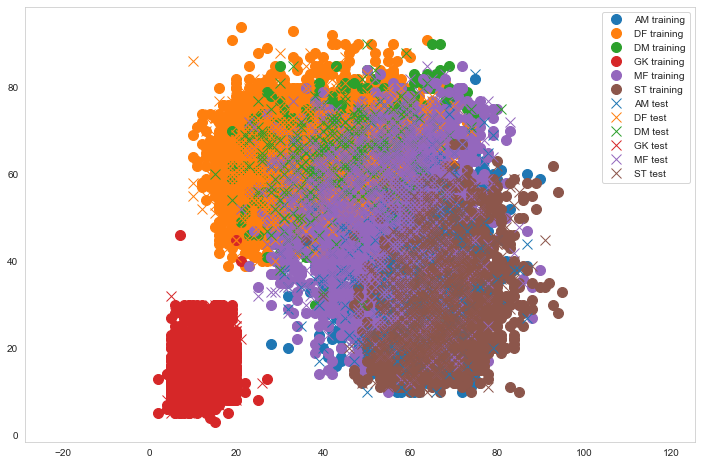

In [49]:
def plot2d(data, label_suffix='', marker='o'):
    classes = data['position'].sort_values().unique()
    for c in classes:
        plt.plot(data.where(data['position']==c).dropna().finishing.values,
                 data.where(data['position']==c).dropna().marking.values,'o', label=c+label_suffix, marker=marker, markersize=10)

    plt.axis('equal')

plt.figure(figsize=(12,8))
plot2d(data_training,' training', marker='o')

#reset dei colori: in questo modo avrò gli stessi colori per training e test set (ripartendo dal blu)
plt.gca().set_prop_cycle(None) 
plot2d(data_test,' test', marker='x')
plt.grid()
plt.legend()
plt.show()

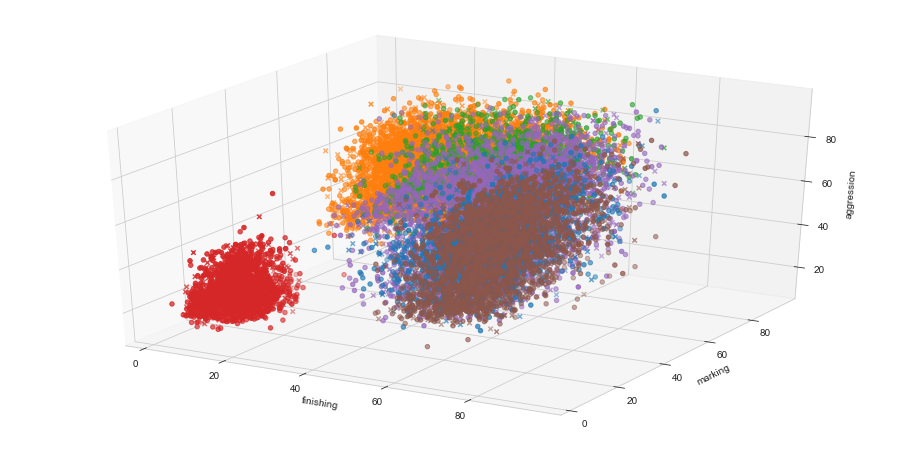

In [50]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.set_xlabel('finishing')
ax.set_ylabel('marking')
ax.set_zlabel('aggression')

def plot3d(data, label_suffix='', marker='o'):
    classes = data['position'].sort_values().unique()
    for c in classes:
        ax.scatter(
            data.where(data['position']==c).dropna().finishing.values, 
            data.where(data['position']==c).dropna().marking.values, 
            data.where(data['position']==c).dropna().aggression.values, 
            marker=marker)

plot3d(data_training,' training', marker='o')

#reset dei colori: in questo modo avrò gli stessi colori per training e test set (ripartendo dal blu)
plt.gca().set_prop_cycle(None) 
plot3d(data_test,' test', marker='x')


In [54]:
from sklearn.neighbors import KNeighborsClassifier as KNN

knn_1 = KNN(n_neighbors=1)
knn_1.fit(data_training.drop('position',axis=1), data_training.position)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')

In [55]:
print("Accuracy sul training set: %0.2f" % knn_1.score(data_training.drop('position',axis=1), data_training.position))
print("Accuracy sul test set: %0.2f" %  knn_1.score(data_test.drop('position',axis=1), data_test.position))

Accuracy sul training set: 1.00
Accuracy sul test set: 0.32


Come possiamo notare, l'algoritmo ci fornisce un'accuracy del 100% sui dati di training ma solo del 34% su quelli di test; esso non riesce pertanto a generalizzare in maniera opportuna. Questo è il risultato ottenuto con un classificatore K-NN con K=1; proviamo ad individuare il valore K che ci fornisce il miglior risultato possibile.

Migliore accuracy di test: 0.34
Migliore k: 15.00


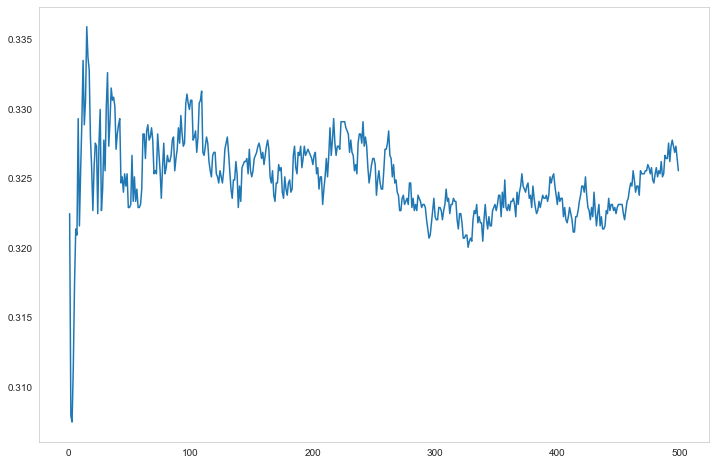

In [56]:
test_accuracies = []
#k_values = range(1,len(data_training)) 
k_values = range(1,500) 
for k in k_values:
    knn = KNN(n_neighbors=k)
    knn.fit(data_training.drop('position',axis=1), data_training.position)
    test_accuracies.append(knn.score(data_test.drop('position',axis=1), data_test.position))

best_index = np.argmax(test_accuracies)
best_k = k_values[best_index]
best_accuracy = test_accuracies[best_index]
print("Migliore accuracy di test: %0.2f" % best_accuracy)
print("Migliore k: %0.2f" % best_k)
    
plt.figure(figsize=(12,8))
plt.plot(k_values,test_accuracies)
plt.grid()
plt.show()

Come possiamo notare dal grafico, il miglior risultato si ottiene scegliendo K=15; riproviamo quindi con un classificatore K-NN, stavolta con K pari a 15.

In [57]:
knn_15 = KNN(n_neighbors=15)
knn_15.fit(data_training.drop('position',axis=1), data_training.position)
print("Accuracy sul training set: %0.2f" % knn_15.score(data_training.drop('position',axis=1), data_training.position))
print("Accuracy sul test set: %0.2f" %  knn_15.score(data_test.drop('position',axis=1), data_test.position))

Accuracy sul training set: 0.38
Accuracy sul test set: 0.33


Possiamo notare come l'accuracy sul test set sia lievemente migliorata rispetto a prima; è tuttavia peggiorata drasticamente sul training set. Questo ci dà modo di comprendere che il classificatore con K=1 è soggetto ad overfitting, e che scegliendo K=15 è possibile ottenere un'accuracy similare tra i 2 differenti set.

Purtroppo, con questi dati a disposizione, non si può avere una buona predizione circa il ruolo di un giocatore. Un giocatore potrebbe infatti ricoprire più ruoli ed essere stato registrato nel dataset con l'ultimo/quello maggiormente ricoperto in campo nella stagione precedente; più in particolare, giocatori con determinate caratteristiche, potrebbero essere stati registrati "fuori ruolo" per poter sfruttare in campo altre qualità, che ben si prestano al modello di gioco dell'intera squadra.

## Conclusioni

In quest'analisi di dati sono stati analizzati i dati dei giocatori relativi alla gioco FIFA19. Inizialmente, ci siamo occupati di un'EDA dove, tramite gli strumenti della statistica descrittiva, sono stati rappresentati e spiegati i dati. Successivamente, tramite regressione lineare, abbiamo cercato di predire il valore di mercato dei giocatori. Nell'ultima parte, abbiamo provato a predire il ruolo dei calciotori mediante due classificatori K-NN: 1-NN e 30-NN. Purtroppo, i risultati di quest'ultima predizione non sono ottimi, ma ciò è anche dovuto alla natura dei dati analizzati.